In [3]:
import rasterio
import rasterio.merge
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import numpy as np
%matplotlib inline

In [4]:
# File and folder paths: path to where raster files are

# dirpath = "/Users/ehsanmos/MLP_dataset/mosaics/test_21apr2016_inOrder_and_reversCams/all_polar_rasters_reversed"
dirpath = "/Users/ehsanmos/MLP_dataset/21april_all_polar_rasters_inOrder/test_mosaicking/all_blocks"


##### select and mosaic a single path

In [5]:
# # select a single path

# path_num = 15
# # final mosaic name
# mosaic_name = "mosaic_rasterio_21april2016_path_"+str(path_num)+"_test_AMLineFixed_CamsInOrder.tif"\
# # mosaic_name = "mosaic_rasterio_21april2016_path_"+str(path_num)+"_test_AMLineFixed_reversCams.tif"\


# # Make a search criteria to select the DEM files
# search_criteria = 'raster_path_'+str(path_num)+'_'+'*_reprojToEPSG_3995.tif'

##### select and mosaic all rasters


In [6]:
# or select all rasters

# final mosaic name
mosaic_name = "mosaic_rasterio_15_july_2016_r_025_inOrderCams_block_20_46.tif"\

# Make a search criteria to select the DEM files
search_criteria = 'raster_path_*'+'*_reprojToEPSG_3995.tif'

In [7]:
# output directory where mosaic goes
out_fp = os.path.join(dirpath, mosaic_name)

q = os.path.join(dirpath, search_criteria)
print(q)
os.path.isdir(dirpath)

/Users/ehsanmos/MLP_dataset/21april_all_polar_rasters_inOrder/test_mosaicking/all_blocks/raster_path_**_reprojToEPSG_3995.tif


True

In [8]:
# glob function can be used to list files from a directory with specific criteria
dem_fps = glob.glob(q)

# Files that were found:
print('rasters found: %s' %len(dem_fps))

rasters found: 12


In [9]:
for iraster in dem_fps:
    print (iraster.split('/')[-1])

raster_path_136_block_15_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_136_block_13_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_152_block_13_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_152_block_15_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_136_block_14_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_136_block_12_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_136_block_18_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_152_block_12_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_152_block_14_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_136_block_17_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif
raster_path_152_block_16_85GCPs_noGdalRes_dTypeFloat64_85gcps_latlon_reprojToEPSG_3995.tif

In [10]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

# src_files_to_mosaic

In [11]:
type(src_files_to_mosaic[0])

rasterio.io.DatasetReader

In [12]:
# np.array(src_files_to_mosaic[0])

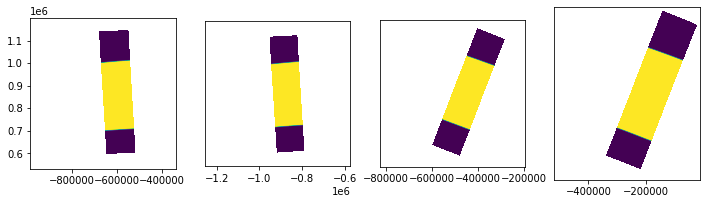

In [13]:
# Create a visual of 4 plots next to each other

import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)


In [20]:
# merge as average


def my_average_method(merged_data, new_data, merged_mask, new_mask, index=None, roff=None, coff=None):
#     merged_data[:] = np.maximum(merged_data, new_data)  # <== NOTE old_data[:] updates the old data array *in place*
#     merged_data[:] = np.mean(np.array(new_data), axis=0)  # ???
#         np.mean(new_data, axis = 0, out=merged_data , dtype = 'uint8')
        x = np.ma.masked_less(in_ar, 0)
        np.mean(x, axis = 0,out = out_ar, dtype = 'uint8')
        mask = np.all(x.mask,axis = 0)
        out_ar[mask]=0


    

mosaic, out_trans = merge(src_files_to_mosaic, method=my_average_method) #  custom callable function with signature


In [21]:
# Merge function returns a single mosaic array and the transformation info

# mosaic, out_trans = merge(src_files_to_mosaic, method='last')

# mosaic, out_trans = merge(src_files_to_mosaic, method='max')

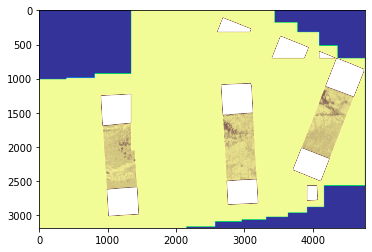

<AxesSubplot:>

In [22]:
# Plot the result

show(mosaic, cmap='terrain')

In [15]:
out_trans

Affine(319.69372367290754, 0.0, -3872646.9042814,
       0.0, -319.69372367290754, 3880465.1281486787)

In [16]:
# Copy the metadata
out_meta = src.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans})

In [17]:
# Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)

In [18]:
print(out_fp)

/Volumes/Ehsan-7757225325/2016/july_2016/predict_roughness_k_zero_npts_10/all_polar_files/polar_raster_subdir_2016_7_15/mosaic_rasterio_15_july_2016_r_025_inOrderCams_block_20_46.tif
